## 3월 14일 Qiskit 개발자 밋업의 Qiskit Runtime 강의 동영상 바로가기 -> https://www.youtube.com/watch?v=oYUT2WSn4HQ


(contents from IBM Quantum Fall Challenge 2022 [lab1](https://github.com/qiskit-community/ibm-quantum-challenge-fall-22/blob/main/content/lab-1/lab1-ko.ipynb)) 

# Part I: Primitives 소개

Primitives는 양자 계산을 수행하고자 하는 사용자들과 양자 알고리즘을 구현하는 개발자, 복잡한 문제를 풀고 새로운 어플리케이션을 전달하는 연구원을 위한 가장 기초적이고 기반이 되는 코드 블록을 제공하고자 합니다.

양자 계산의 관점에서 중요성을 이야기하기 전에, 먼저 "프리미티브" 라는 단어가 정확히 어떤 의미인지와 이 단어가 우리에 무엇을 의미하는지에 대해서 알아보겠습니다.

프리미티브 요소를 정의하도록 요청하면 **생물학자**는 아마 이렇게 답할 것입니다: "공통 조상 그룹에서 상속되는 특성 또는 특징". 같은 질문에 대한 **수학자**의 답은 "유한한 범위에 한해서 해당 범위의 곱셈 요소 그룹 생성자"일 것입니다. 만약 **CAD 모델을 사용하는 디자이너**라면 이렇게 얘기할 것입니다: "복잡한 기하학적 형태를 구축할 때 사용하는 시스템에서 가능한 형태 중 가장 단순한 것" 이라고 말입니다.



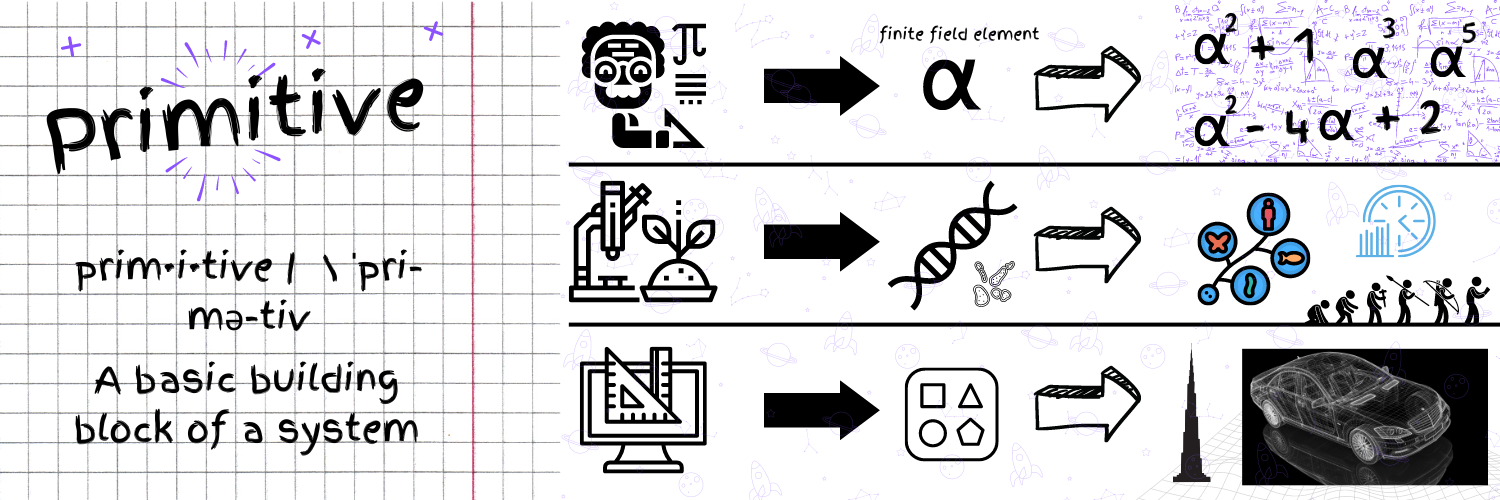

이 세가지 대답에서 어떤 걸 파악할 수 있을까요? 모든 정의는 하나의 공통점을 갖는 것처럼 보입니다. 궁극적으로 그들이 정의하는 프리미티브는 더 복잡한 요소를 만들기 위한 쌓기 블록 역할을 하는 **기본 요소**입니다.

이제 일반적인 컴퓨터에서 이것의 의미를 찾는다고 하면, 우리가 무엇을 "프리미티브"라고 부를 수 있을까요? 컴퓨팅에서 언어 프리미티브의 의미를 살펴봅시다. 언어 프리미티브는 프로그래밍 언어에서 사용 가능한 가장 간단하고 더 이상 나눌 수 없는 최소의 요소로 정의됩니다. 아마 컴퓨터의 모든 것이 0과 1이 전부인 바이너리로 저장된다는 사실을 들어보셨을 겁니다. 그리고 그건 부정할 수 없는 완벽한 사실입니다. 그러나 만약 우리가 바이너리 숫자를 프로그래밍 언어의 프리미티브 구조로 설정한다면, 아마도 코딩을 하는 데에 있어서 굉장히 힘들 것입니다. 그래서 더 적절한 접근은 고급 프로그래밍 언어로 프리미티브라는 용어를 정의하는 것이 되겠습니다. 이 방법대로 _더 이상 나눌 수 없는_ 것으로 분류를 한다면 프로그래밍을 하고 이를 이해하는데 더 쉬울 것입니다.

이에 관한 언어 프리미티브 개념의 좋은 예시는 바로 프리미티브 데이터 타입입니다. 어떤 언어를 고르는지에 따라 일반적으로 더 이상 나눌 수 없는 데이터 타입을 가지게 될 것이고, 이것은 사용하고자 하는 의도에 기초해 더 복잡한 데이터 타입을 만드는 데에 사용될 것입니다. 예를 들어: `int` 와 `float`, `string`, `boolean` 은 _일반적으로_ 파이썬에서 프리미티브라고 여겨집니다. 반면에, 파이썬에서 **문자열 배열** 이나 **이름이 들어있는 리스트**, **십진법 좌표의 튜플**, **정수의 세트** 는 모두 프리미티브 데이터 타입이 아닙니다. 단지 프리미티브 데이터 타입으로 만들어진 것들입니다.

그럼 이제 프로그래밍에서 일반적인 함수를 같은 방법으로 정의할 수 있을까요? 어떻게 사용하는지에 따라 더 복잡하고 정교한 프로그램 요소나 인터페이스를 위한 코드의 기초 인터페이스나 세그먼트를 프리미티브 함수로 정의할 수 있을 것입니다.

## 그럼 Quantum이랑은 어떤 관련이 있나요?

언어 프리미티브와 관련해 위에서 설명했던 대로, 비록 컴파일했을 때 바이너리 숫자나 기계어가 기술적으로는 코어 프리미티브 구조라는 것을 알고 있다고 해도, 기계어를 쓰는 낮은 수준이 아닌 보다 접근하기 쉬운 프로그램을 만들 수 있도록 범주화를 통해 상위 수준의 프리미티브 용어를 정의합니다. 대부분 우리는 가장 주요한 컴파일 언어가 효율적인 컴파일 루틴을 내장하고 있을 것을 기대합니다. 그리고 이를 고려했을 때 우리는 현재 시스템에 대해 최적화가 되어 있는 실행 워크플로를 기대하므로 상하고 프로그래밍 언어에서 미리 정의된 프리미티브와 문법을 사용해 프로그램을 창조할 수 있습니다.

**이제 Quantum과 관련된 질문입니다: 양자 계산 루틴이나 워크플로를 위한 구조를 이와 같이 정의하는 방법이 있을까요?**

## Qiskit Runtime Primitives 소개:

![Qiskit Runtime 구조](https://cloud.ibm.com/docs-content/v1/content/fe08b8e3a114015612ab3ed112afa281d6ce896a/quantum-computing/images/Qiskit_Runtime_architecture.png)

주로 클라우드의 QPU인 주어진 _Quantum 워크플로_ 를 최대화하기 위해, 대규모의 효율적인 실행으로 워크로드를 최적화하도록 구축된 서비스를 준수하는 컴퓨팅 프로그래밍 모델을 가집니다. 작년부터 Qiskit Runtime 서비스는 컨테이너화된 실행을 컨셉으로 만들어졌습니다; 여러 계산 요소가 패키지화되어 어떤 시스템에서든 간편하게 실행되는 실행 모델을 뜻합니다. 클라우드에 각각의 회로를 보내는 대신 전체 프로그램은 종속된 프로그램과 함께 패키지화되어 클라우드 상에서 실행됩니다. 이를 통해 지연 시간을 절약하고 반복 루프에 대한 오버헤드를 줄입니다.

새로 업데이트된 Qiskit Runtime 서비스에서는 단순히 Runtime 서비스의 새로운 기능이 아닌, Qiskit Runtime 서비스의 인터페이스로 작동하는 새로운 프로그래밍 모델의 도입으로 더 확장된 프로그래밍 경험에 집중하였습니다: 바로 **Qiskit Runtime Primitives**의 등장입니다!

## Qiskit Runtime Primitives: Sampler와 Estimator 소개

양자를 위한 primitives 정의를 시작하기 위해 두 가지 후보자(현재 시점 기준)를 소개합니다. 비록 양자 계산 과정을 위해 기초 요소를 정의할 몇 가지 방법이 있다고 할지라도, 이 primitive 구조에 앞으로도 더 많은 추가 사항이 있을 것입니다. 다만 현 시점에서 정의하는 두 개의 primitive 정의는 이렇습니다.

여기서 고전 컴퓨터와 구별되는 양자컴퓨터의 핵심 기능은 출력에서 비고전적 확률 분포를 생성하는 능력입니다. 얻은 매우 확률적인 계산 결과의 고유한 특성으로 인해 확률 분포의 형태로 사용 가능한 정보를 생성하기 위해 동일한 회로에 대해 여러 번 실행해야 합니다. 확률 분포로 할 수 있는 기본 계산은 샘플링하거나 수량을 추정하는 것입니다.

주목할만한 두 핵심 포인트는 **1) 확률 분포를 샘플링**한다는 것과 **2) 값을 추정**할 수 있다는 것입니다. 우리는 각각의 기능에 적절한 두 primitives의 이름을 붙여줄 것입니다. 바로 **Sampler**와 **Estimator**로 말이죠!

### Sampler

Sampler는 본질적으로 이름이 포함하는 것과 동일합니다. 결과를 샘플링함으로 주어진 양자 회로의 전체적인 quasi-probability 분포를 추정합니다. 사용자의 회로를 입력으로 받아 quasiprobabilities의 에러-완화 readout을 생성하는 프로그램이라고도 할 수 있습니다. 이는 사용자에게 에러 완화를 사용한 샷 결과를 평가하는 더 나은 방법을 제공하고, 상쇄 간섭의 관점에서 여러 개의 연관된 데이터 값의 확률을 더 효율적으로 평가할 수 있게 합니다.

즉, 회로를 실행할 때 얻은 익숙한 "counts"의 결과와 매우 비슷하지만 Sampler는 오류 완화 루틴의 결과로 준 확률 분포(quasi-probability distribution)의 출력을 얻을 수 있습니다.

간단히 말하면, 보다 넓은 범위의 정보 데이터를 자유롭게 사용할 수 있게 되는 것을 의미합니다. 준 확률 분포의 표현에서 얻은 정보는 진정한 확률 분포와의 유사도를 조사하거나샘플링 오버헤드와 교환하여 편향되지 않은 기대 값 포인트를 계산하는 데 더 관련이 있을 수 있습니다. 이러한 분포는 어떤 의미에서 진정한 확률처럼 행동하지만, 다른 점은 원래 이론의 제약이 몇 가지 완화된다는 것입니다. 그 중 하나는 "음수의" 확률을 나타내는 음의 데이터 포인트가 존재할 가능성입니다 (그러나 집합적으로 합이 1이 될 수 있음). 준확률 분포를 실제 확률로 오해해서는 안되며 사용 상황에 따라 특정 오류 범위까지 가장 가까운 실제 확률 분포로 추정할 수 있습니다. 샘플러를 활용할 수 있는 몇 가지 사용 사례는 Grovers 검색, QSVM 루틴, 안정기 계산, 최적화 루틴 등입니다.

샘플러는 전체 출력에 대한 완전한 분포를 제공하지만 사용자는 특정 결과에 대한 정보에만 관심이 있을 수 있으며 이런 분들을 위해 **Estimator**를 살펴보겠습니다!

### Estimator

Estimator는 대상 연산자의 기대값을 계산하고 해석합니다. 회로와 관측가능량(observable)을 입력으로 받아 회로와 관측가능량 사이를 선택적으로 그룹핑하여 실행하고 주어진 파라미터 입력에 대한 기대치와 분산을 효율적으로 평가하는 프로그램 인터페이스입니다. 이 Primitive를 사용해 많은 알고리즘에서 필요한 양자 연산자의 기대값 계산과 해석을 효율적으로 수행할 수 있습니다.

주어진 문제에 대한 최종 솔루션을 찾는 것이 주요 목표인, 전체 측정값의 분포를 알 필요가 없는 사람들에게는 Estimator 프리미티브가 더 유용합니다. 이 루틴은 기본적으로 대부분의 현재의 양자 알고리즘에 유용하게 사용할 수 있습니다.  가장 일반적인 예로는 알고리즘의 변분 클래스를 들 수 있습니다. Estimator는 회로 외에 양자 관측가능량의 기대값을 계산하므로 반드시 입력에 넣어주어야 합니다. 여기에서 관측가능량은 분자의 전자 구조, 최적화 문제에 대한 비용 함수 등과 같은 다양한 항목을 인코딩하여 넣을 수 있습니다.

## Qiskit Runtime를 사용하는 이유

그렇다면 왜 이 새로운 프로그래밍 패러다임이 중요할까요? 답은 Qiskit Runtime 서비스의 인터페이스와 그 위에 구축된 강력한 서비스와 프레임워크를 활용하기 위함입니다.

Section 1에서는 최적화된 워크플로우를 실현하기 위해 컴파일러에 의존하면서 보다 높은 수준의 개발을 가능하게 하는 언어 프리미티브를 정의했지만 Runtime은 다음과 같은 일반적인 분야에서의 활약을 기대됩니다:

- **효율** : 양자 백엔드를 위해 설계된 반복적인 워크로드를 위한 고도로 최적화된 루틴 및 옵션
- **지연 시간** : Sessions 프레임워크를 사용하여 스케줄링, 작업 우선 순위 지정 및 공유 캐싱을 통해 대기 시간을 줄이고 결과를 얻는 시간을 단축함.
- **일관성** : 기존의 Primitive 모델을 보완하는 새로운 추가 기능으로 서비스 전반에 걸쳐 복잡한 루틴을 구축하는 일관된 프로그래밍 모델
- **커스터마이징 가능성** : 작업의 컨텍스트 및 매개변수를 기반으로 하는 맞춤형 회로로 반복적인 루틴 관리
- **오류 완화 및 억제** : 양자 정보의 품질 향상을 위해 간단하고 추상화된 인터페이스를 통한 쉬운 오류 완화 및 억제 기능의 향상

Qiskit Runtime 서비스를 사용하면 앞서 설명된 Primitive 프로그래밍 모델들을 사용하여 이러한 이점을 즉시 활용할 수 있습니다. 이 노트북은 Sessions 프레임워크와 함께 Sampler 및 Estimator 프리미티브를 사용하는 방법을 소개하고 현재 사용 가능한, 그리고 계속 개발 중인 몇 가지 오류 완화 전략을 보여줍니다. 뒤를 이은 노트북들은 이 곳에서 학습한 내용을 기반으로 Primitive 프로그래밍 모델을 활용하여 기계 학습, 최적화 및 화학 영역에서 보다 일반적인 알고리즘 루틴을 구축하는 방법에 대한 것이 될것입니다.

Qiskit Runtime 서비스를 사용하여 Primitive 구조를 기반으로 프로그램을 작성하는 방법을 살펴보겠습니다.

In [ ]:
pip install qiskit-ibm-runtime

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

In [6]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import hellinger_fidelity
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map


# Operators from Qiskit
from qiskit.quantum_info import SparsePauliOp

# Import simulator primtives from Aer
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.primitives import Estimator as QiskitEstimator
from qiskit.primitives import Sampler as QiskitSampler


# Plotting tools
import matplotlib.pyplot as plt


In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator

In [ ]:
# Save the Runtime account credentials if you have not done so already
# If you need to overwrite the account info, please add `overwrite=True`
#my_token = 'your token'
#QiskitRuntimeService.save_account(channel='ibm_quantum', token=my_token, overwrite=True)

In [8]:
service = QiskitRuntimeService(instance="ibm-q-yonsei/internal/qc-and-simulatio")

In [9]:
service.backends()

[<IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_geneva')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibm_washington')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_seattle')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>]

In [10]:
service.least_busy(n_qubits=27, operational=True)

<IBMBackend('ibm_hanoi')>

In [11]:
sim = service.get_backend('ibmq_qasm_simulator')
backend = service.get_backend('ibm_auckland')

##### 파트 III: How to Use Primitives

Primitive를 사용하는 방법을 알아봅시다. 먼저 살펴볼 첫 번째 Primitive는 Sampler Primitive입니다. 먼저 세션의 개념에 대해 알아봅시다:

클라우드에서 Primitive를 사용하려면 세션을 안전하게 열고 닫기 위해 컨텍스트 관리자를 사용해야 합니다. 이것은 생성자가 관련 매개변수와 Sampler 및 Estimator 메서드를 사용하여 대기열의 작업을 전달하는 `Session` 키워드를 사용하여 수행됩니다. 이러한 세션 또는 팩토리의 개념을 사용하면 작업을 양자 컴퓨터에 대한 반복 호출의 모음으로 정의할 수 있습니다. 세션을 시작하면 사용자가 보내는 데이터를 캐시하므로 각 반복 작업 마다 Quantum Datacenter로 전송할 필요가 없습니다. `Options`을 사용하여 현재 세션과 해당 매개변수를 구성하고 실행 환경을 제어합니다. 이 방식을 사용하면 광범위하고 다양한 Primitive 프로그램을 한번에 호출할 수 있습니다.  

Sampler를 사용하기 위해 사용할 회로를 하나 만들어 봅시다. 

Qiskit의 random_circuit 함수를 사용해 5큐비트를 사용하는 random 회로를 만들어 봅시다.

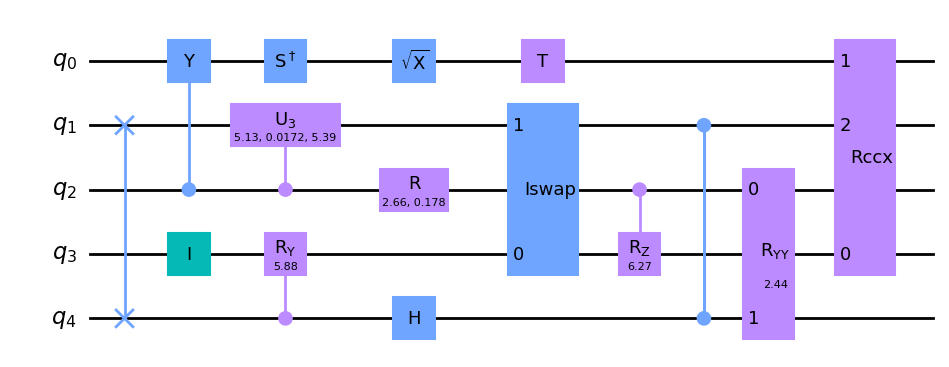

In [12]:
from qiskit.circuit.random import random_circuit
circuit = random_circuit(5, 5, seed=0, measure=False)
display(circuit.draw("mpl"))

이 회로의 이상적인 결과를 Qiskit의 StatevectorSimulator와 Sampler를 사용해 확인해 봅시다.

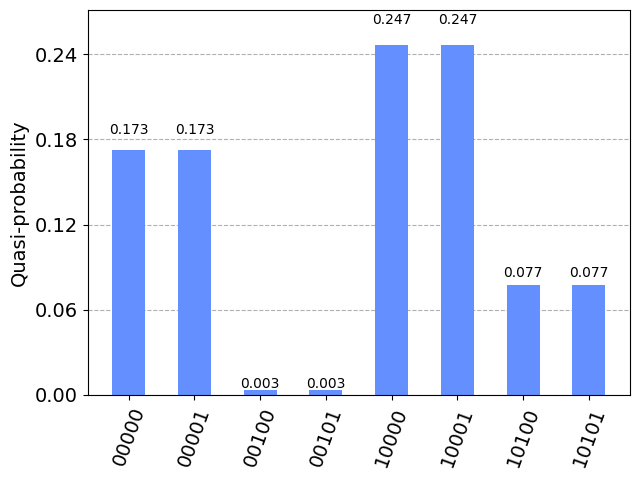

In [13]:
from qiskit_aer import StatevectorSimulator
aer_backend = StatevectorSimulator()
circuit_tr = transpile(circuit, aer_backend)
#display(circuit_tr.draw('mpl', idle_wires=False))
ideal_counts = aer_backend.run(circuit_tr).result().get_counts()
plot_histogram(ideal_counts)

In [15]:
circuit.measure_all()

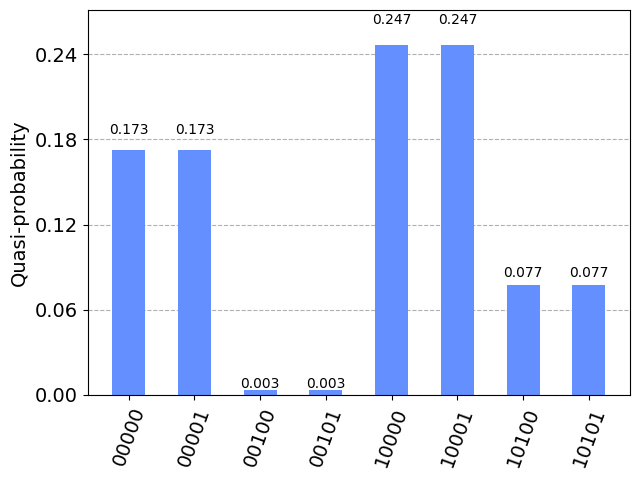

In [16]:
qsampler= QiskitSampler()
result = qsampler.run(circuit).result()
plot_distribution(result.quasi_dists[0].binary_probabilities())

이어서 Qiskit Aer가 지닌, AerSampler를 사용해서 먼저 회로를 시뮬레이션 해보도록 합시다.

In [21]:
sampler = AerSampler()
result = sampler.run(circuit, shots=20000).result()

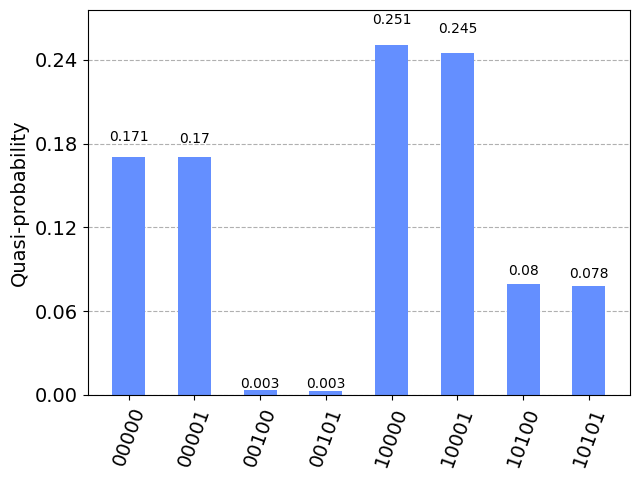

In [22]:
plot_distribution(result.quasi_dists[0].binary_probabilities())

In [23]:
#run job by using cloud simulator

from qiskit_ibm_runtime import Sampler, Session, Options

options = Options(simulator={"seed_simulator": 42}, resilience_level=0)

with Session(service=service, backend=sim):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=circuit, shots=20000)
    result = job.result()

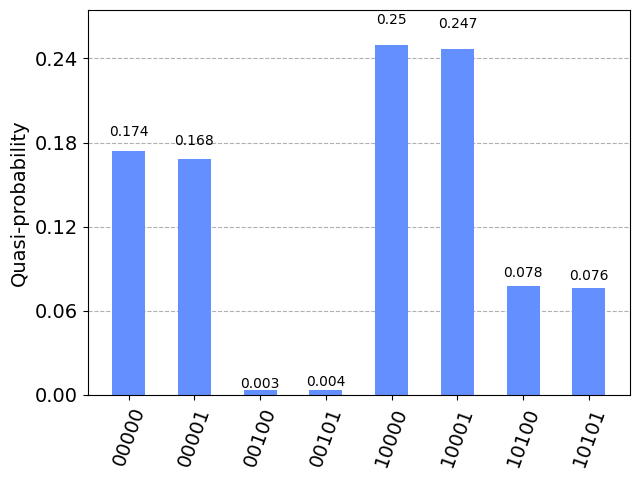

In [24]:
plot_distribution(result.quasi_dists[0].binary_probabilities())

In [25]:
# run job by using real backend without error mitigation

session = Session(backend=backend)
sampler = Sampler(session=session)
tr_circuit = transpile(circuit, backend)

#sampler_job1 = sampler.run(tr_circuit,shots=int(1e4))

In [ ]:
#sampler_job1.job_id()

In [26]:
sampler_job1 = service.runtime.job('ch4psp97o5gvn6pgcfq0')
sampler_job1.status()

<JobStatus.DONE: 'job has successfully run'>

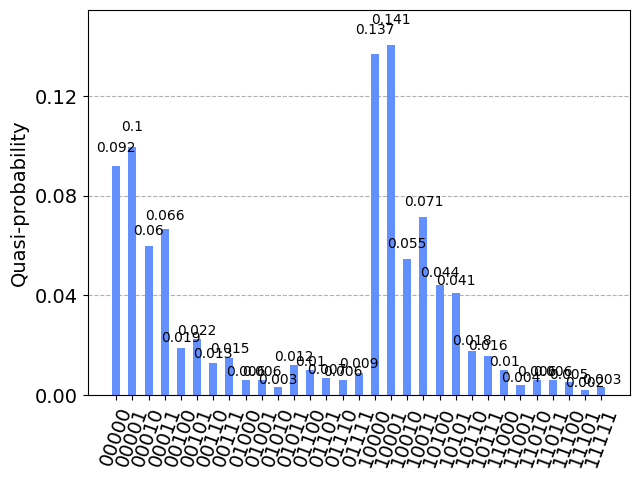

In [27]:
result = sampler_job1.result()
plot_distribution(result.quasi_dists[0].binary_probabilities())

# 3.2: Example using Estimator

Estimator는 양자 연산자의 계산 및 평가된 기대값을 제공합니다. Estimator를 사용하려면 '측정이 없는' 회로가 있어야 합니다. 그 이유는 VQE와 같은 알고리즘을 실행할 때 Estimator가 해밀토니안을 얻는 과정에서 단일 큐비트 회전을 바인딩하기 때문이며 이로 인해 양자 회로에 측정을 포함할 수 없습니다. 

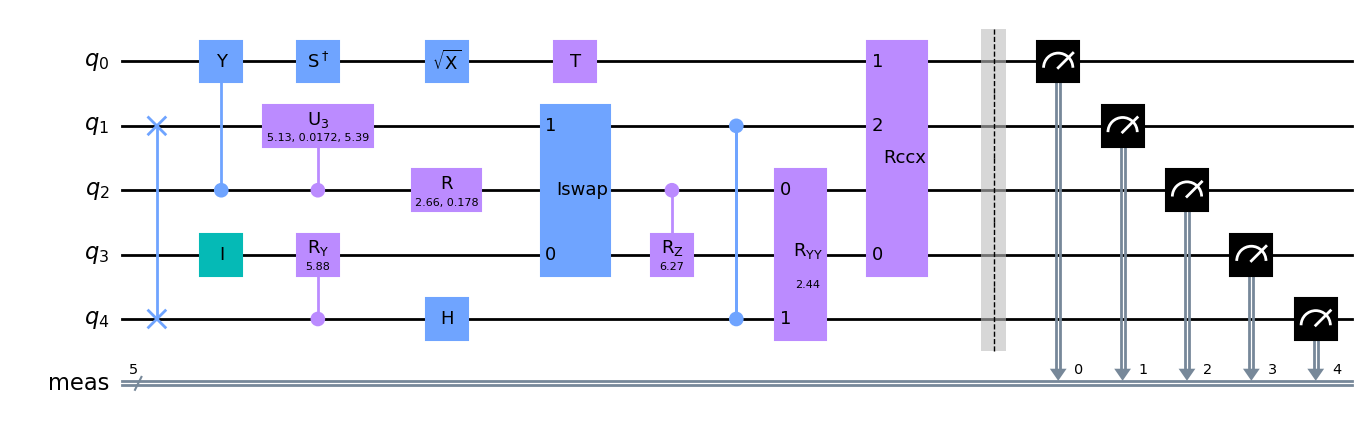

In [28]:
display(circuit.draw('mpl'))

현재 회로 `qc`에는 측정이 포함되어 있으므로 `remove_final_measurements`로 이를 제거합니다.

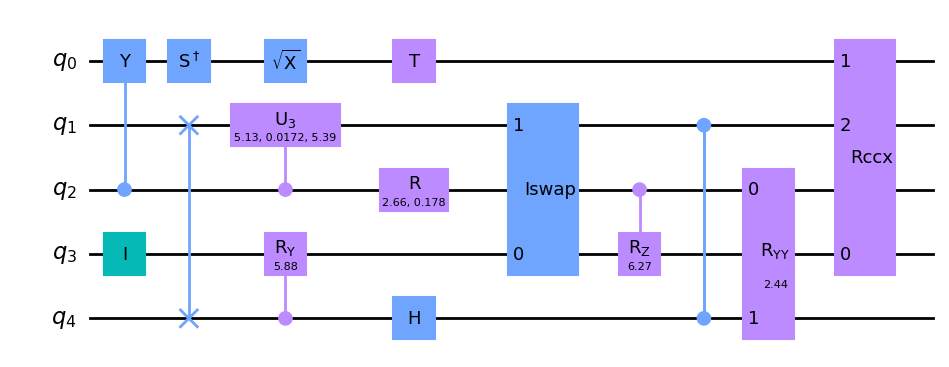

In [29]:
qc_no_meas = circuit.remove_final_measurements(inplace=False)
qc_no_meas.draw('mpl')

기대값을 계산하려면 회로에 대해 관찰 가능한 값을 설정해야 합니다. 우선 모든 큐비트에 대해 Z 축 측정을 해보겠습니다.

만약 두개의 큐비트를 가진 회로에 대해 ZZ측정을 하면 돌아오는 값은 다음과 같이 계산됩니다.

$$
\langle ZZ\rangle =\langle \psi | ZZ | \psi\rangle=\langle \psi|(|0\rangle\langle 0| -|1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle =|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2
$$

In [30]:
ZZZZZ = SparsePauliOp.from_list([("ZZZZZ", 1)])

가장 먼저 Qiskit의 Estimator를 사용해 이상적인 결과를 얻어 봅시다.

In [31]:
est_res=[]

In [32]:
qestimator = QiskitEstimator()
q_est_res = qestimator.run(qc_no_meas, ZZZZZ).result()
print(q_est_res.values[0])
est_res.append(q_est_res.values[0])

-6.938893903907228e-17


다음으로 aer의 Estimator를 사용해 보겠습니다.

In [33]:
aer_estimator = AerEstimator()

In [34]:
aer_est_res = aer_estimator.run(qc_no_meas, ZZZZZ, shots=int(10e4)).result()

In [35]:
print(aer_est_res.values[0])
est_res.append(aer_est_res.values[0])

0.0004


우선 같은 QiskitSimulator를 사용해서 이 회로의 모든 큐비트를 각각 X축과 Y축으로 측정해보도록 합시다.

In [36]:
XXXXX = SparsePauliOp.from_list([("XXXXX", 1)])
YYYYY = SparsePauliOp.from_list([("YYYYY", 1)])

In [37]:
q_est_res = qestimator.run(qc_no_meas, XXXXX).result()
q_est_res.values[0]

0.0

이 결과가 원래 회로의 측정 전 Hadamard 게이트를 적용하고 ZZZZZ 측정을 한 결과와 같은지 비교해 봅시다.

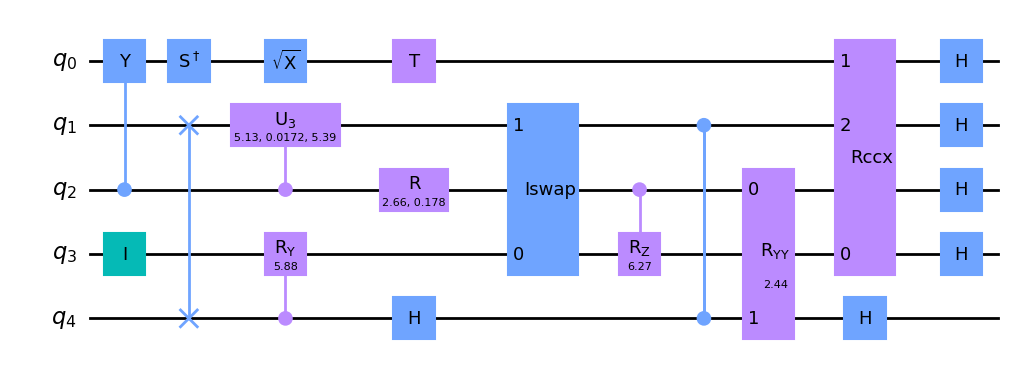

In [38]:
circuit_h = QuantumCircuit(5)
circuit_h = qc_no_meas.copy()
circuit_h.h(range(5))
circuit_h.draw('mpl')

In [39]:
q_est_res = qestimator.run(circuit_h, ZZZZZ).result()
q_est_res.values[0]

0.0

같은 코드를 사용해서, 이 회로의 큐비트를 모두 Y축으로 측정해 봅시다.

In [40]:
q_est_res = qestimator.run(qc_no_meas, YYYYY).result()
q_est_res.values[0]

0.0

같은 회로를 리얼 백엔드를 사용해 실행해 봅시다.

In [ ]:
session = Session(service=service, backend=backend)
estimator = Estimator(session=session)
#estimator_job0 = estimator.run(qc_no_meas, ZZZZZ , shots=int(10e4))
#estimator_job0.job_id()

In [42]:
estimator_job0 = service.runtime.job('ch4rcr0l1tcjfhma9krg')
estimator_job0.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
result0 = estimator_job0.result()
print(result0.values[0])
est_res.append(result0.values[0])

Qiskit Runtime은 사용자에게 최적의 양자백엔드 실행 결과를 제공하기 위해 자동의 error mitigation 옵션을 제공합니다.

https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/error-mitigation.html

사용법은 아주 간단합니다. Sampler나 Estimator 사용시 `resilience_level` 을 원하는대로 설정해서 사용하기만 하면 충분합니다.

우리의 샘플 회로에 resilience_level을 설정해 리얼 백엔드에 실행해 보고 결과를 이상적인 결과와 비교해 봅시다.

먼저, 샘플러를 사용해봅시다.

In [ ]:
#sampler with resilience level 1
session = Session(backend=backend)
sampler = Sampler(session=session)
#sampler_job2 = sampler.run(tr_circuit,shots=int(1e4), resilience_level=1)
#sampler_job2.job_id()

In [ ]:
sampler_job2 = service.runtime.job('ch4qc6o5ngm0qheo6q6g')
sampler_job2.status()

In [ ]:
result = sampler_job2.result()
plot_distribution(result.quasi_dists[0].binary_probabilities())

다음은 Estimator에 각 resilience level을 사용해 결과를 확인해 보도록 합시다.

In [ ]:
options1 = Options(optimization_level=3, resilience_level=1)
options2 = Options(optimization_level=3, resilience_level=2)
options3 = Options(optimization_level=3, resilience_level=3)

session = Session(service=service, backend=backend)
estimator = Estimator(session=session, options=options1)

In [ ]:
#estimator_job = estimator.run(qc_no_meas, ZZZZZ , shots=int(10e4))
#estimator_job.job_id()

In [43]:
estimator_job = service.runtime.job('ch4rc7accl2b15pdu7hg')
estimator_job.status()

<JobStatus.DONE: 'job has successfully run'>

In [44]:
result1 = estimator_job.result()
print(result1.values[0])
#est_res.append(result1.values[0])

0.0013462948207171315


In [ ]:
estimator = Estimator(session=session, options=options2)
#estimator_job2 = estimator.run(qc_no_meas, ZZZZZ , shots=int(10e4))
#estimator_job2.job_id()

In [ ]:
estimator = Estimator(session=session, options=options3)
#estimator_job3 = estimator.run(qc_no_meas, ZZZZZ , shots=int(10e4))
#estimator_job3.job_id()

In [45]:
estimator_job2 = service.runtime.job('ch4rcf9pleju568bt9i0')
estimator_job2.status()

<JobStatus.DONE: 'job has successfully run'>

In [47]:
result2 = estimator_job2.result()
print(result2.values[0])
#est_res.append(result2.values[0])

-0.003921666666666668


In [48]:
estimator_job3 = service.runtime.job('ch4rcho5ngm0qhepa8k0')
estimator_job3.status()

<JobStatus.RUNNING: 'job is actively running'>

In [ ]:
result3 = estimator_job3.result()
print(result3.values[0])
#est_res.append(result3.values[0])

NameError: name 'QuantumCircuit' is not defined